# Základy práce s Python
Python lze použít jako základní scirptovací jazyk, nebo jako silný programovací jazyk s objekty a vlasními knohovnami. V tomto cvičení budeme využívat ukázek spouštěšní scriptů v prostředí jupyter, které umožňuje interaktivní práci s jazykem Python. Detaily na (https://jupyter.org/).

Příkazy se zpracovávají jeden po druhém, symbol ukončení je konec řádku, vnitřní blok se odděluje tabulátorem

# Google API a instalace knihoven
Klíčové knihovny, které budeme používat pro práci s google api jsou k dispozici v rámci instalačních balíků pomocí pip (https://pip.pypa.io/en/stable/) nebo přes nástroj Anaconda (https://www.anaconda.com/) (již máte nainsotalované na vašich virtuálních strojích). Konkrétní knihovny, které budeme potřebovat jsou nálsedující:
- `google-cloud-language` pro analýzu jazyka
- `google-cloud-vision` pro analýzu pbrazu
- `google-cloud` zastřešující balík, pokud nechcete načítat jednotlivé balíky 
- `google-oauth` pro zajištění snadné autentizace

Je důležité vědět, jak si potřebné knihovny do Python nainstalovat. K tomu slouží příkaz

```pip install --user --upgrade google-cloud-language google-cloud google-cloud-vision google-oauth```,

který spusťte v příkazové řádce (Windows => Start => Command prompt)

Základem jazyka Python je práce s knihovnami a kontrola, že vše je správně nainstalované. Načtení knihovan a ověření provedeme pomocí následujícího příkazu:

In [1]:
from google.cloud import language_v1
from google.oauth2 import service_account

V případě, že se vám povedlo předchozí příkazy spustit bez chybových hlášek, je vše korektně nainstalováno a je možné začít pracovat v s Google API

Dalším kontrolním bodem je schopnost přihlásit se k vašemu účtu z Python, k tomu slouží následující příkazy. Je potřeba začít s tím, aby jste již vygenerovaný soubor s přihlašovacími údaji zpřístupnili pythony:

In [2]:
creds = service_account.Credentials.from_service_account_file('./credentials.json')

In [3]:
client = language_v1.LanguageServiceClient(credentials=creds)

Začneme jednoduchým testem funkčnosti API na věte, kterou napíšeme do proměnné:

In [4]:
text_content = 'I am so happy and joyful.'

Nastavíme nezbytné proměnné pro API, především kódóvání (Python používá ve ver 3 a výše plně UTF-8)

In [5]:
language = "en"
type_ = language_v1.Document.Type.PLAIN_TEXT
encoding_type = language_v1.EncodingType.UTF8
document = {"content": text_content, "type_": type_, "language": language}

Pro analýzu entit se využívá Google API analyze_entities v sekci language_v1.LanguageServiceClient (definovali jsme si ji do proměnné client). Proto stačí volat příkaz client.analyze_sentiment. A jelikož budeme v dalším pokračování používat analýzu textu vícekrát, napíšeme si proceduru:

In [6]:
response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})

Pokud vše proběhlo bez chyb, máme schopnost používat Google API pro analýzu textu. a Výsledek analýzy sentimentu máme k dispozci v proměnné `response` 

V případě, že vám objevila chybová hláška, že nemáte aktivováno Google API pro zpracování jazyka, použijte odkaz z chybové hlášky a pomocí tlačítka Enable (po přihlášení k vašemu google účtu) příslušnou API aktivujte. a Spusťte příkaz znovu.
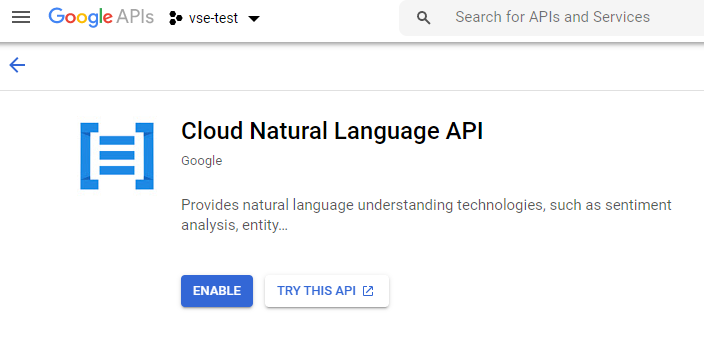

In [7]:
response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})

In [8]:
score = response.document_sentiment.score
magnitude = response.document_sentiment.magnitude
print("Overall Sentiment: score of {} with magnitude of {}".format(score, magnitude))

Overall Sentiment: score of 0.8999999761581421 with magnitude of 0.8999999761581421


# Jak použít Google API přímo bez Python
pomocí odkazu na stránce: https://cloud.google.com/natural-language/#natural-language-api-demo


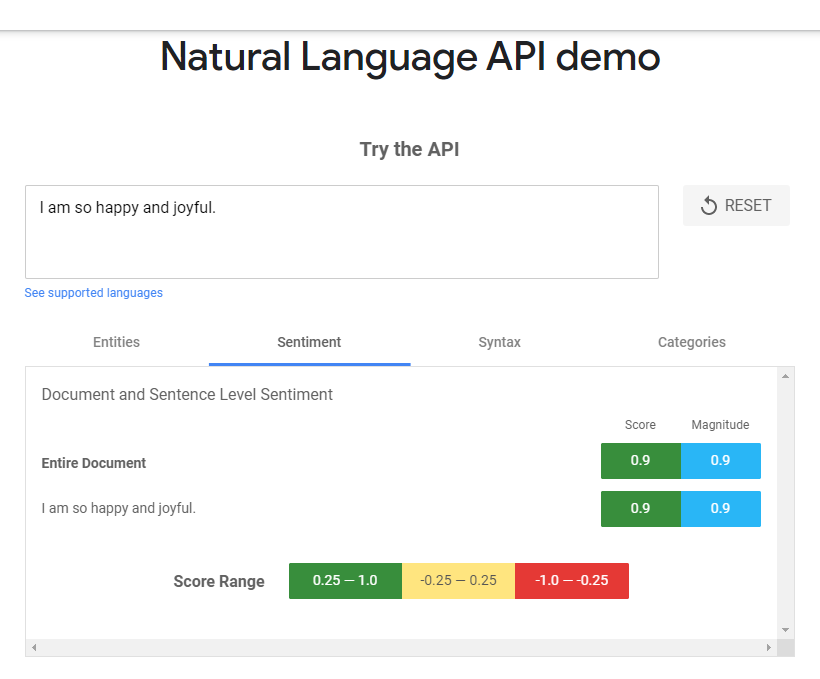

# Jaké možnosti nám Google API v oblasti analýzy textu poskytuje
- **Analýza sentimentu** - nejen postavená na skóre jednotlivých slov, ale sentiment celé věty
- **Analýza entit** - identifikuje slova jako entity (př. Mesto, jméno, ...)
- **Analýza syntaxe** - rozklad věty na jednotlivé komponenty
Je možné si všechny tři funkcionality vyzkoušet ve webovém Google rozhraní (https://cloud.google.com/natural-language/#natural-language-api-demo), nebo je díky výše uvedeným knihovnám zvládneme použít v Pythonu

Pro **analýzu entit** se využívá Google API `analyze_entities` v sekci `language_v1.LanguageServiceClient` (definovali jsme si ji do proměnné `client`). Proto stačí volat příkaz `client.analyze_entitites`.
A jelikož budeme v dalším pokračování používat analýzu textu vícekrát, napíšeme si proceduru:

In [9]:
def analyze_entity(text):
    language = "en"
    type_ = language_v1.Document.Type.PLAIN_TEXT
    encoding_type = language_v1.EncodingType.UTF8
    document = {"content": text, "type_": type_, "language": language}
    response = client.analyze_entities(request = {'document': document, 'encoding_type': encoding_type})
    return response

In [25]:
text = '''Google, headquartered in Mountain View (1600 Amphitheatre Pkwy, Mountain View, CA 940430),
unveiled the new Android phone for $799 at the Consumer Electronic Show. Sundar Pichai said in his keynote
that users love their new Android phones.'''

In [26]:
print(text)
response = analyze_entity(text)

Google, headquartered in Mountain View (1600 Amphitheatre Pkwy, Mountain View, CA 940430),
unveiled the new Android phone for $799 at the Consumer Electronic Show. Sundar Pichai said in his keynote
that users love their new Android phones.


Výstup zobrazíme uživateli procházením jednotlivých entit:

In [27]:
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))

Název entity: Google - Typ entity: ORGANIZATION - Skóre: 0.18886299431324005
Název entity: Mountain View - Typ entity: LOCATION - Skóre: 0.17920063436031342
Název entity: Android - Typ entity: CONSUMER_GOOD - Skóre: 0.14206703007221222
Název entity: Sundar Pichai - Typ entity: PERSON - Skóre: 0.10975376516580582
Název entity: phone - Typ entity: CONSUMER_GOOD - Skóre: 0.09722497314214706
Název entity: users - Typ entity: PERSON - Skóre: 0.08834461867809296
Název entity: Amphitheatre Pkwy - Typ entity: LOCATION - Skóre: 0.07451575994491577
Název entity: CA 940430 - Typ entity: OTHER - Skóre: 0.05068293213844299
Název entity: keynote - Typ entity: OTHER - Skóre: 0.029002878814935684
Název entity: phones - Typ entity: CONSUMER_GOOD - Skóre: 0.0246114581823349
Název entity: Consumer Electronic Show - Typ entity: EVENT - Skóre: 0.015732960775494576
Název entity: 1600 Amphitheatre Pkwy, Mountain View, CA - Typ entity: ADDRESS - Skóre: 0.0
Název entity: $799 - Typ entity: PRICE - Skóre: 0.0
N

Můžeme chtí vypsat seznam jenom identifikovaných míst:

In [28]:
for entity in response.entities:
    if language_v1.Entity.Type(entity.type_).name == 'LOCATION':
        print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
            entity.name,
            language_v1.Entity.Type(entity.type_).name,
            entity.salience))

Název entity: Mountain View - Typ entity: LOCATION - Skóre: 0.17920063436031342
Název entity: Amphitheatre Pkwy - Typ entity: LOCATION - Skóre: 0.07451575994491577


# A co čeština :-)?
S tou to není úplně úspěšné - český jazyk není mezi podporovanými jazyky. Seznam podporovaných jazyků je k dizpozici na tomto odkazu https://cloud.google.com/natural-language/docs/languages

In [29]:
text = 'Praha je hlavní město České republiky, platí se v něm Českou korunou, jejíž symbol dle normy ISO je CZK a označení Kč.'

In [30]:
response = analyze_entity(text)

In [31]:
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))

Název entity: Praha je - Typ entity: OTHER - Skóre: 0.5335420370101929
Název entity: České republiky - Typ entity: PERSON - Skóre: 0.20395882427692413
Název entity: Českou korunou - Typ entity: PERSON - Skóre: 0.14263518154621124
Název entity: symbol dle - Typ entity: OTHER - Skóre: 0.0750325471162796
Název entity: ISO - Typ entity: ORGANIZATION - Skóre: 0.04483138769865036


# Hromadné zpracování dat ze souborů
pro zpracování souborů je vhodné použít knihovnu ```pandas```

In [17]:
import pandas as pd

načteme data z csv souboru pomocí příkazu `read_csv` z knihovky `pandas` (už ji máme přejmenovanou na `pd`). Soubor má více sloupců, ale my použijeme poce sloupec `text`.

In [18]:
df = pd.read_csv("hotel_data.csv", 
                 index_col=False, 
                 usecols=['text'], 
                 dtype={'text':"string"})

In [19]:
df.head(4)

text
0  We were together with some friends at the Anew...
1  Martin and his staff are truely great! They ma...
2  We have stayed at the Excelsior on numerous oc...
3  The great reviews are well deserved. Stayed he...

In [20]:
text_content = df['text'].values[0]
print(text_content)

We were together with some friends at the Anewandter Hof. We took all 4 apartments, which enabled us privacy & piece. Apartments are fully equiped. Free use of sauna & whirlpool in the hotel was a bonus. Every morning there is a fresh bread waiting for us at the door. Great atmosphere, hospitable family Mairl and affordable price.


In [21]:
response = analyze_entity(text_content)

In [22]:
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))

Název entity: apartments - Typ entity: LOCATION - Skóre: 0.2990044951438904
Název entity: friends - Typ entity: PERSON - Skóre: 0.23836290836334229
Název entity: bonus - Typ entity: OTHER - Skóre: 0.12117205560207367
Název entity: Anewandter Hof - Typ entity: LOCATION - Skóre: 0.05640145763754845
Název entity: Apartments - Typ entity: LOCATION - Skóre: 0.035194337368011475
Název entity: Mairl - Typ entity: PERSON - Skóre: 0.03374439477920532
Název entity: sauna - Typ entity: LOCATION - Skóre: 0.031219061464071274
Název entity: piece - Typ entity: OTHER - Skóre: 0.03110240027308464
Název entity: whirlpool - Typ entity: LOCATION - Skóre: 0.028662536293268204
Název entity: hotel - Typ entity: LOCATION - Skóre: 0.028662536293268204
Název entity: privacy - Typ entity: OTHER - Skóre: 0.02686368115246296
Název entity: door - Typ entity: OTHER - Skóre: 0.02157873660326004
Název entity: atmosphere - Typ entity: OTHER - Skóre: 0.021530646830797195
Název entity: price - Typ entity: OTHER - Skóre: